## Data Cleaning and Preprocessing

In [1]:
# import python libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
# import csv file
df = pd.read_csv('Online Sales Data.csv',encoding= 'unicode_escape')

In [3]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [4]:
df.shape

(240, 9)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,240.0,10120.500000,69.426220,10001.0,10060.750,10120.50,10180.250,10240.00
Units Sold,240.0,2.158333,1.322454,1.0,1.000,2.00,3.000,10.00
Unit Price,240.0,236.395583,429.446695,6.5,29.500,89.99,249.990,3899.99
Total Revenue,240.0,335.699375,485.804469,6.5,62.965,179.97,399.225,3899.99


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [7]:
pd.isnull(df).sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')

# Data Visualization Analytics

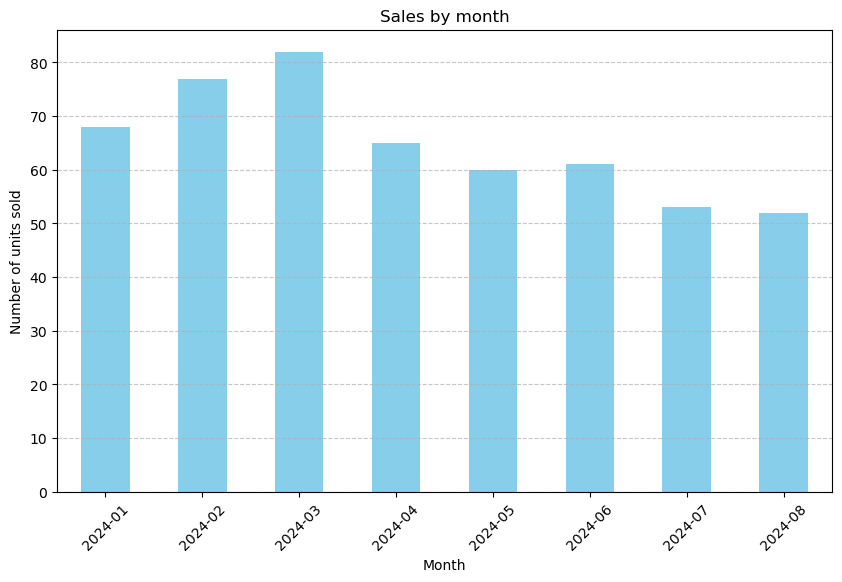

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Units Sold'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by month')
plt.xlabel('Month')
plt.ylabel('Number of units sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

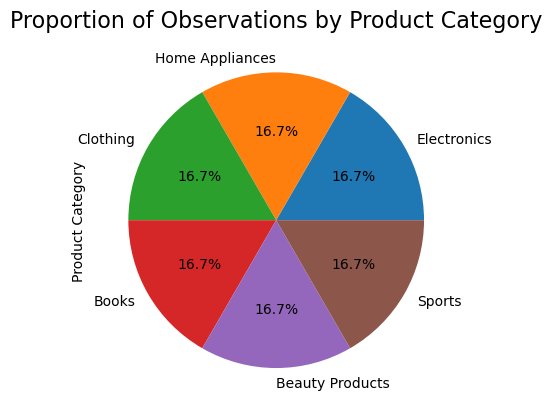

In [11]:
# Create the pie chart
ax = df['Product Category'].value_counts().plot.pie(autopct='%1.1f%%')
ax.set_title('Proportion of Observations by Product Category', size=16)
plt.show()

In [12]:
df['Product Name'].unique()

array(['iPhone 14 Pro', 'Dyson V11 Vacuum', "Levi's 501 Jeans",
       'The Da Vinci Code', 'Neutrogena Skincare Set',
       'Wilson Evolution Basketball', 'MacBook Pro 16-inch',
       'Blueair Classic 480i', 'Nike Air Force 1',
       'Dune by Frank Herbert', 'Chanel No. 5 Perfume',
       'Babolat Pure Drive Tennis Racket', 'Samsung Galaxy Tab S8',
       'Keurig K-Elite Coffee Maker', 'North Face Down Jacket',
       'Salt, Fat, Acid, Heat by Samin Nosrat',
       'Dyson Supersonic Hair Dryer', 'Manduka PRO Yoga Mat',
       'Garmin Forerunner 945', 'Ninja Professional Blender',
       'Zara Summer Dress', 'Gone Girl by Gillian Flynn',
       'Olay Regenerist Face Cream', 'Adidas FIFA World Cup Football',
       'Bose QuietComfort 35 Headphones', 'Panasonic NN-SN966S Microwave',
       'Adidas Ultraboost Shoes', 'Pride and Prejudice by Jane Austen',
       'MAC Ruby Woo Lipstick', 'Nike Air Zoom Pegasus 37',
       'Sony WH-1000XM4 Headphones', 'Instant Pot Duo',
       'Under Arm

In [13]:
df['Product Name'].nunique()

232

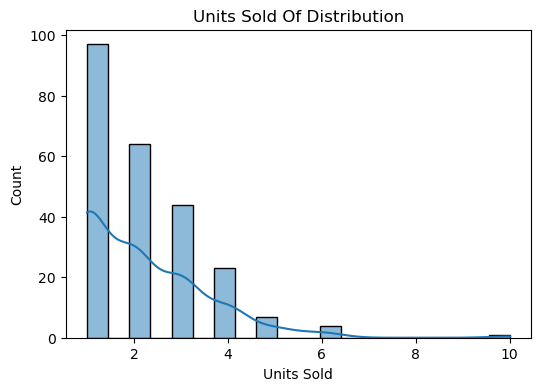

In [14]:
plt.figure(figsize = (6, 4))
sns.histplot(df['Units Sold'], bins = 20, kde = True, edgecolor = 'black')
plt.title('Units Sold Of Distribution')
plt.xlabel('Units Sold')
plt.ylabel('Count')
plt.show()

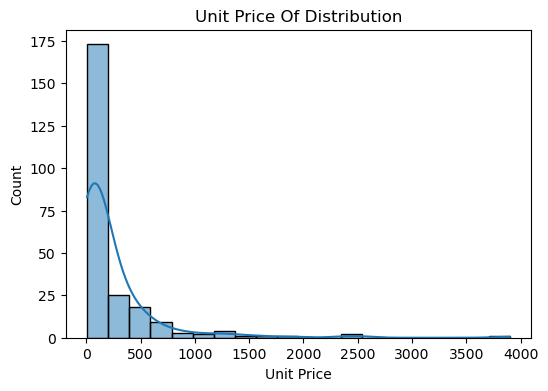

In [15]:
plt.figure(figsize = (6, 4))
sns.histplot(df['Unit Price'], bins = 20, kde = True, edgecolor = 'black')
plt.title('Unit Price Of Distribution')
plt.xlabel('Unit Price')
plt.ylabel('Count')
plt.show()

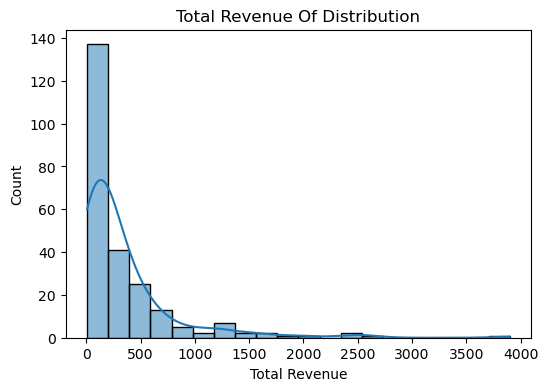

In [16]:
plt.figure(figsize = (6, 4))
sns.histplot(df['Total Revenue'], bins = 20, kde = True, edgecolor = 'black')
plt.title('Total Revenue Of Distribution')
plt.xlabel('Total Revenue')
plt.ylabel('Count')
plt.show()

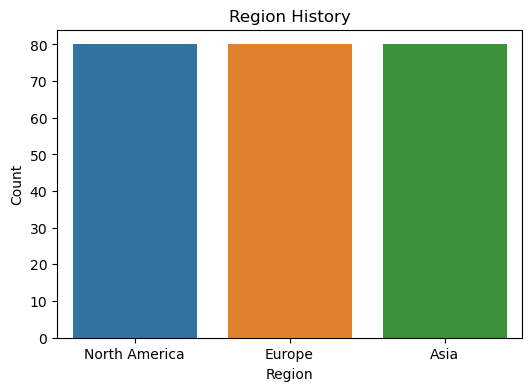

In [17]:
plt.figure(figsize = (6, 4))
sns.countplot(x = 'Region', data = df)
plt.title('Region History')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

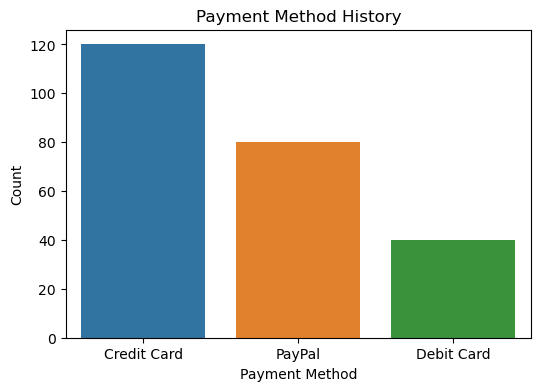

In [18]:
plt.figure(figsize = (6, 4))
sns.countplot(x = 'Payment Method', data = df)
plt.title('Payment Method History')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

In [19]:
sales_total_revenue=df.groupby('Region')['Total Revenue'].sum()
sales_total_revenue

Region
Asia             22455.45
Europe           21268.06
North America    36844.34
Name: Total Revenue, dtype: float64

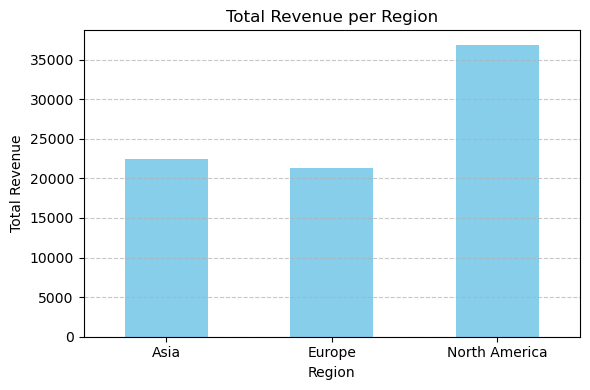

In [20]:
sales_total_revenue_region = df.groupby('Region')['Total Revenue'].sum()

plt.figure(figsize=(6, 4))
sales_total_revenue_region.plot(kind='bar', color='skyblue')
plt.title('Total Revenue per Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [21]:
sales_per_units_sold_region = df.groupby('Region')['Units Sold'].sum()
sales_per_units_sold_region

Region
Asia             233
Europe           105
North America    180
Name: Units Sold, dtype: int64

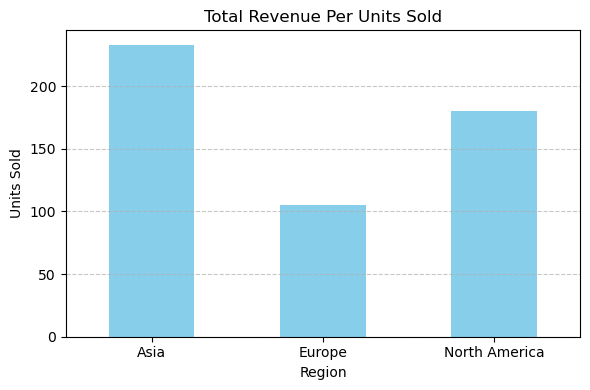

In [22]:
sales_per_units_sold_region = df.groupby('Region')['Units Sold'].sum()

plt.figure(figsize=(6, 4))
sales_per_units_sold_region.plot(kind='bar', color='skyblue')
plt.title('Total Revenue Per Units Sold')
plt.xlabel('Region')
plt.ylabel('Units Sold')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [23]:
sales_product_category_total_revenue = df.groupby('Product Category')['Total Revenue'].sum()
sales_product_category_total_revenue

Product Category
Beauty Products     2621.90
Books               1861.93
Clothing            8128.93
Electronics        34982.41
Home Appliances    18646.16
Sports             14326.52
Name: Total Revenue, dtype: float64

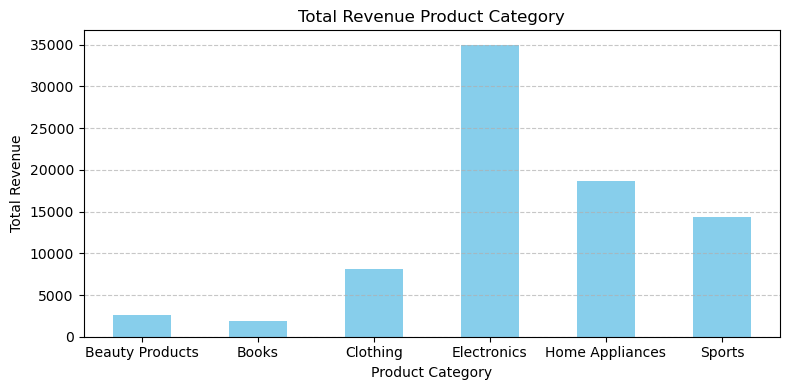

In [24]:
sales_product_category_total_revenue = df.groupby('Product Category')['Total Revenue'].sum()

plt.figure(figsize=(8, 4))
sales_product_category_total_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [25]:
sales_payment_method_total_revenue = df.groupby('Payment Method')['Total Revenue'].sum()
sales_payment_method_total_revenue

Payment Method
Credit Card    51170.86
Debit Card      8128.93
PayPal         21268.06
Name: Total Revenue, dtype: float64

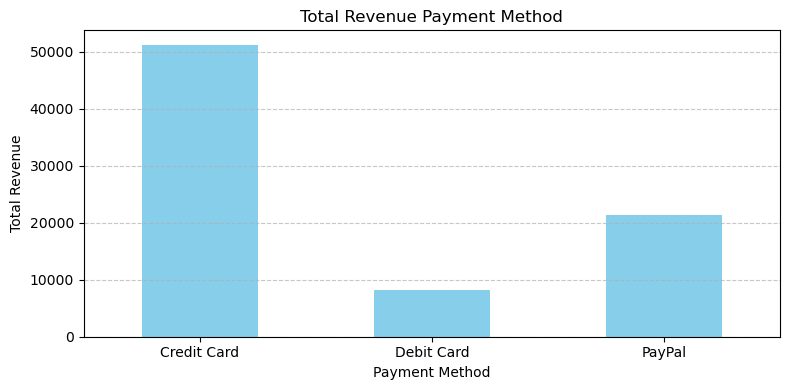

In [26]:
sales_payment_method_total_revenue = df.groupby('Payment Method')['Total Revenue'].sum()

plt.figure(figsize=(8, 4))
sales_payment_method_total_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [27]:
sales_trends = df.groupby('Date')['Total Revenue'].sum().reset_index()

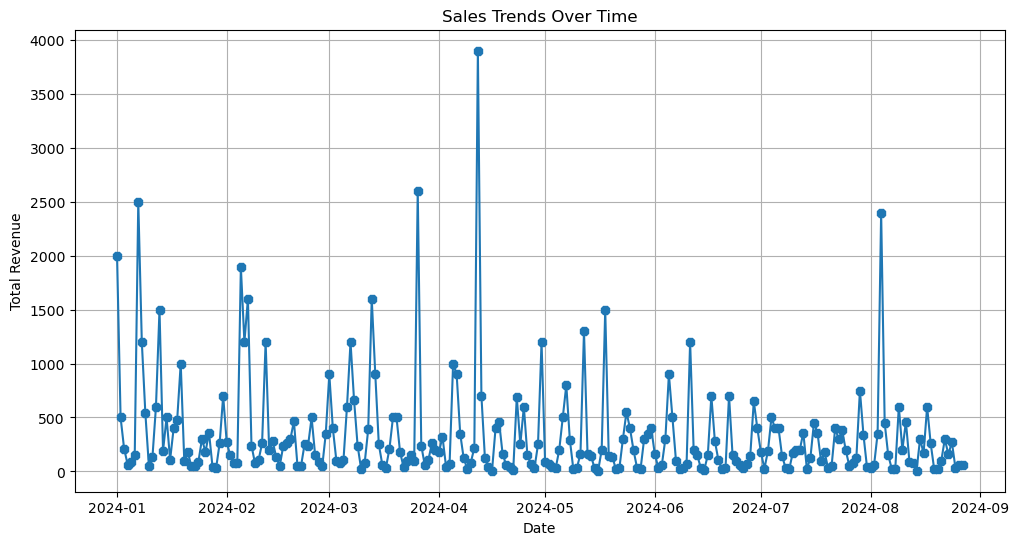

In [28]:
sales_trends['Date'] = pd.to_datetime(sales_trends['Date'])

sales_trends = sales_trends.sort_values('Date')

if sales_trends['Date'].isnull().any() or sales_trends['Total Revenue'].isnull().any():
    print("There are missing values in the 'Date' or 'Total Revenue' columns.")
else:
    plt.figure(figsize=(12, 6))
    plt.plot(sales_trends['Date'], sales_trends['Total Revenue'], marker='8')
    plt.title('Sales Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Revenue')
    plt.grid(True)
    plt.show()

In [29]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Revenue'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

monthly_sales

,Month,Total Revenue
0,2024-01-01,14548.32
1,2024-02-01,10803.37
2,2024-03-01,12849.24
3,2024-04-01,12451.69
4,2024-05-01,8455.49
5,2024-06-01,7384.55
6,2024-07-01,6797.08
7,2024-08-01,7278.11


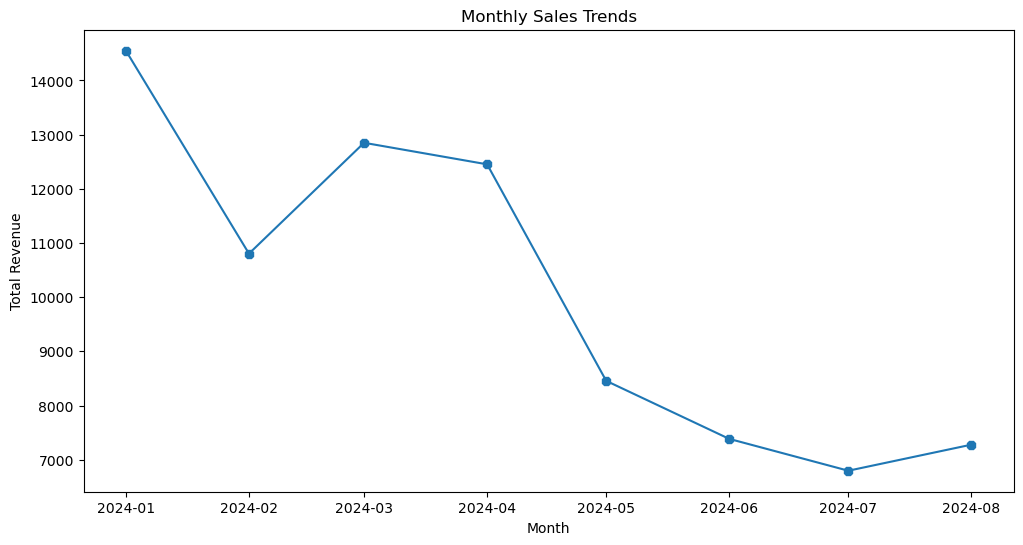

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Total Revenue'], marker='8')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

## Outliers Analytics

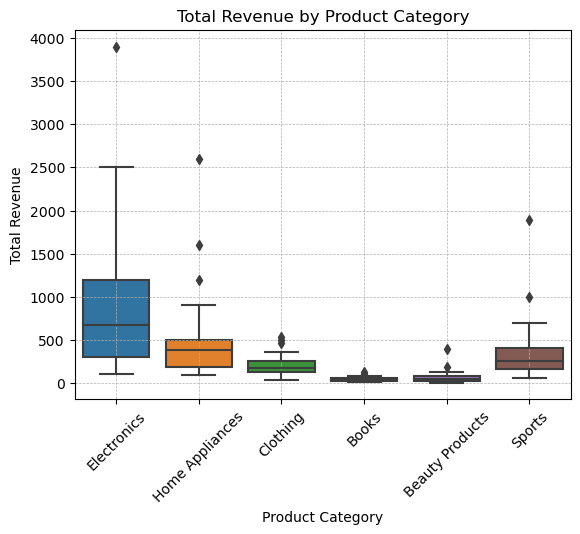

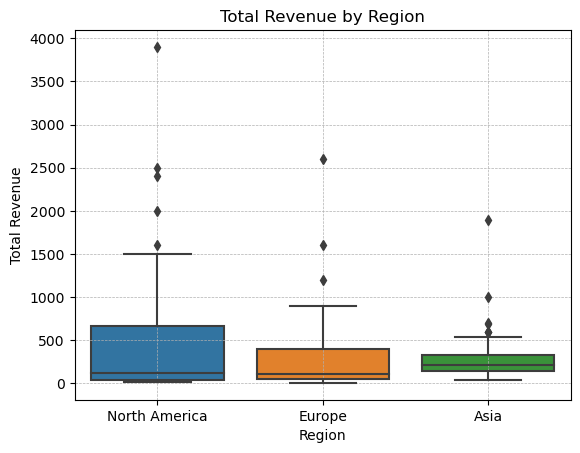

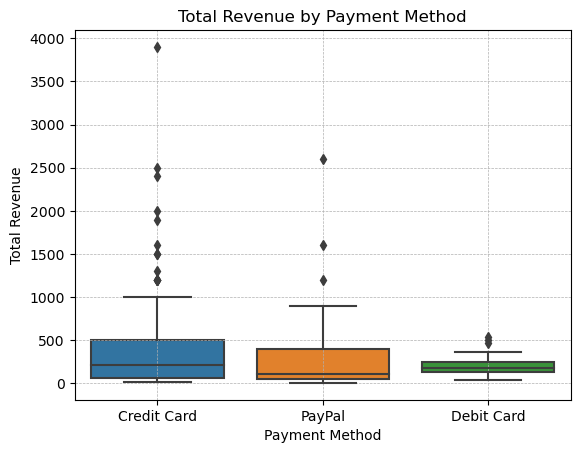

In [31]:
# Total Revenue by Product Category Outliers
sns.boxplot(x='Product Category', y='Total Revenue', data=df)
plt.title('Total Revenue by Product Category')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Total Revenue by Region Outliers
sns.boxplot(x='Region', y='Total Revenue', data=df)
plt.title('Total Revenue by Region')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Total Revenue by Payment Method Outliers
sns.boxplot(x='Payment Method', y='Total Revenue', data=df)
plt.title('Total Revenue by Payment Method')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()